In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('housing_market_data.csv')

# Check the first few rows of the dataset
print(data.head())


         Date Region    Price  Bedrooms  Area (sq ft)
0  01/01/2018  North   419906         4          1039
1  01/02/2018  North   911771         5          3279
2  01/03/2018  North  1068436         3          4636
3  01/04/2018  North  1106363         5          4275
4  01/05/2018  North   858825         5          3008


In [4]:
# Handle missing values (for simplicity, let's drop them)
data = data.dropna()

# Remove duplicates if any
data = data.drop_duplicates()

# Convert Date column to datetime format if needed
data['Date'] = pd.to_datetime(data['Date'])

# Check the data types and summary stats
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          360 non-null    datetime64[ns]
 1   Region        360 non-null    object        
 2   Price         360 non-null    int64         
 3   Bedrooms      360 non-null    int64         
 4   Area (sq ft)  360 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 14.2+ KB
None
                      Date         Price    Bedrooms  Area (sq ft)
count                  360  3.600000e+02  360.000000    360.000000
mean   2020-07-07 12:00:00  7.009011e+05    2.925000   2775.625000
min    2018-01-01 00:00:00  1.626600e+05    1.000000    503.000000
25%    2019-01-06 18:00:00  5.153372e+05    2.000000   1808.000000
50%    2020-07-07 12:00:00  7.108600e+05    3.000000   2711.500000
75%    2022-01-06 06:00:00  8.918065e+05    4.000000   3781.500000
ma

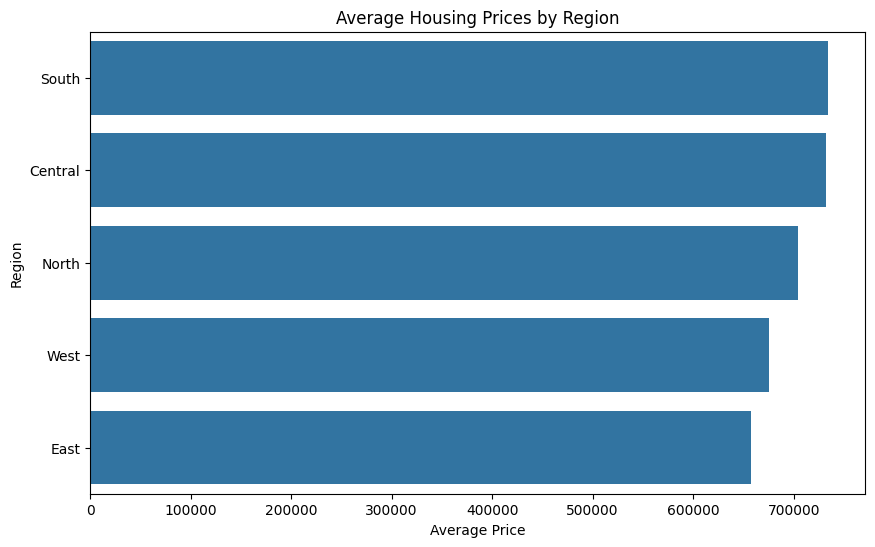

In [5]:
# Group by region and calculate the average price
region_price = data.groupby('Region')['Price'].mean().reset_index()

# Sort by price and visualize
region_price = region_price.sort_values(by='Price', ascending=False)

# Plot average prices by region
plt.figure(figsize=(10,6))
sns.barplot(x='Price', y='Region', data=region_price)
plt.title('Average Housing Prices by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

In [ ]:
# Create a correlation matrix
corr_matrix = data[['Price', 'Bedrooms', 'Area (sq ft)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

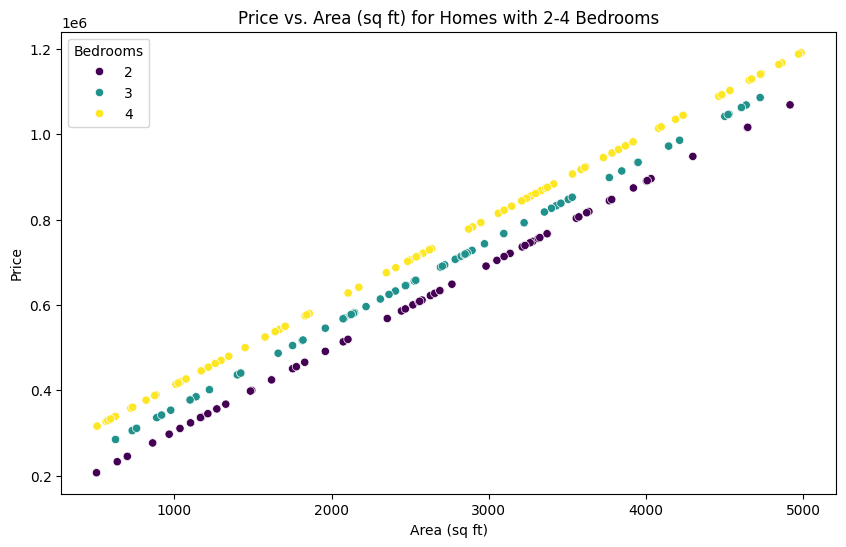

In [7]:
# Filter for homes with 2 to 4 bedrooms
filtered_data = data[(data['Bedrooms'] >= 2) & (data['Bedrooms'] <= 4)]

# Scatter plot for Price vs. Area (sq ft)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (sq ft)', y='Price', data=filtered_data, hue='Bedrooms', palette='viridis')

# Add title and labels
plt.title('Price vs. Area (sq ft) for Homes with 2-4 Bedrooms')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()